##Preparation

In [28]:
# Import the libraries we need for this lab
import torch
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as dsets

## Neural Network Module and Training Function

In [29]:
# Build the model with sigmoid function
class Net(nn.Module):

  # Constructor
  def __init__(self, D_in, H, D_out):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  # Prediction
  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x

In [30]:
# Build the model with Tanh function
class NetTanh(nn.Module):

  # Constructor
  def __init__(self, D_in, H, D_out):
    super(NetTanh, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  # Prediction
  def forward(self, x):
    x = torch.tanh(self.linear1(x))
    x = self.linear2(x)
    return x

In [31]:
# Build the model with Relu function
class NetRelu(nn.Module):

  # Constructor
  def __init__(self, D_in, H, D_out):
    super(NetRelu, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  # Prediction
  def forward(self, x):
    x = torch.relu(self.linear1(x))
    x = self.linear2(x)
    return x

In [32]:
# Define the function for training the model
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
  useful_stuff = {'training_loss': [], 'validation_accuracy': []}
  i = 0

  for epoch in range(epochs):
    for i, (x, y) in enumerate(train_loader):
      optimizer.zero_grad()
      z = model(x.view(-1, 28*28))
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      useful_stuff['training_loss'].append(loss.item())
    correct = 0
    for x, y in validation_loader:
      yhat = model(x.view(-1, 28*28))
      _, label = torch.max(yhat, 1)
      correct += (label==y).sum().item()
    accuracy = 100 * (correct/len(validation_dataset))
    useful_stuff['validation_accuracy'].append(accuracy)
  return useful_stuff


## Make Some Data

In [33]:
# Create the training dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
#Create the validation  dataset
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [34]:
# Create the criterion function
criterion = nn.CrossEntropyLoss()

In [35]:
# Create the training data loader and validation data loader object
train_loader = DataLoader(dataset=train_dataset, batch_size=2000, shuffle=False)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=True)

## Define the Neural Network, Criterion Function, Optimizer, and Train the Model

In [36]:
# Create the criterion function
criterion = nn.CrossEntropyLoss()
# Create the model object
input_dim = 28*28
hidden_dim = 100
output_dim = 10
model_sigmoid = Net(input_dim, hidden_dim, output_dim)
model_tanh = NetTanh(input_dim, hidden_dim, output_dim)
model_relu = NetRelu(input_dim, hidden_dim, output_dim)

## Test Sigmoid, Tanh, and Relu

In [37]:
# Train a model with sigmoid function
learning_rate = 0.01
optimizer = torch.optim.SGD(model_sigmoid.parameters(), lr=learning_rate)
training_results_sigmoid = train(model_sigmoid, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [38]:
# Train a model with tanh function
learning_rate = 0.01
optimizer = torch.optim.SGD(model_tanh.parameters(), lr=learning_rate)
training_results_tanh = train(model_tanh, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [39]:
# Train a model with relu function
learning_rate = 0.01
optimizer = torch.optim.SGD(model_relu.parameters(), lr=learning_rate)
training_results_relu = train(model_relu, criterion, train_loader, validation_loader, optimizer, epochs=30)

## Analyze Results

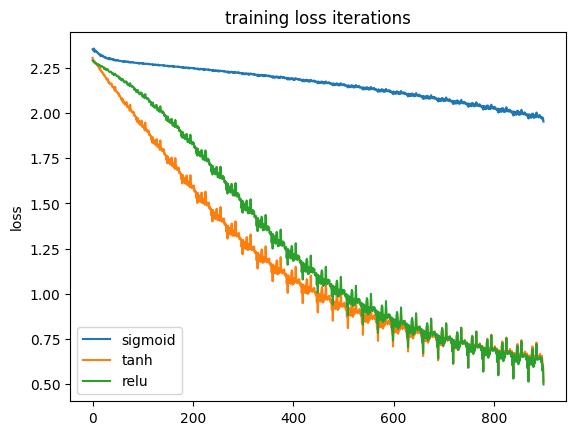

In [40]:
# Compare the training loss
plt.plot(training_results_sigmoid['training_loss'], label='sigmoid')
plt.plot(training_results_tanh['training_loss'], label='tanh')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

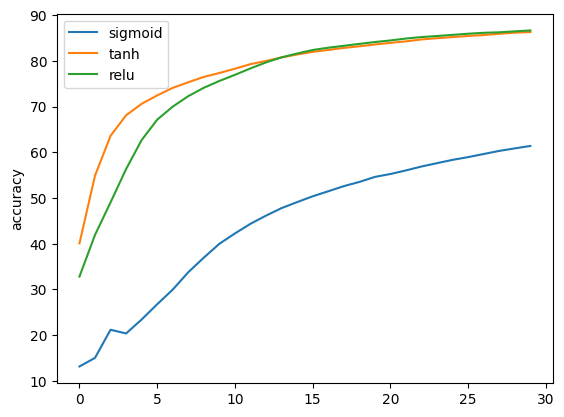

In [41]:
# Compare the validation loss
plt.plot(training_results_sigmoid['validation_accuracy'], label='sigmoid')
plt.plot(training_results_tanh['validation_accuracy'], label='tanh')
plt.plot(training_results_relu['validation_accuracy'], label='relu')
plt.ylabel('accuracy')
plt.legend()
plt.show()